In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
from matplotlib import rcParams
import matplotlib.font_manager as font_manager
font_dirs = ['/home/johnme/blockchain-notebook/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

In [3]:
colors = {'red': '#e41a1c', 'blue': '#377eb8',
          'green': '#4daf4a', 'grey': '#404040'}


font = 'Clear Sans'

plt.rcParams["figure.figsize"] = [8.5, 4.5]

plt.rcParams['font.family'] = font
plt.rcParams['font.sans-serif'] = font

plt.style.use('fivethirtyeight')

plt.rcParams['axes.linewidth'] = 1

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False


plt.rcParams['ytick.color'] = 'black'
plt.rcParams['xtick.color'] = 'black'

plt.rcParams['axes.edgecolor'] = colors['grey']

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 6
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 6

plt.rcParams['font.size'] = 20

pd.set_option('precision', 8)


In [542]:
def sigmoid(x):
    return 1/(1+np.e**-x)

def plot(X, Y, xlabel=None, ylabel=None, xlog=False, label=None, ax=None, color=None):
    if not ax:
        fig, ax = plt.subplots(nrows=1)

    plt.plot(X, Y, color=color, label=label)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(which='major', axis='both', linestyle='--')
    ax.grid(which='minor', axis='both', linestyle=':')

    #ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    #ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(.1))

    if label:
        plt.legend()
    if xlog:
        ax.set_xscale('log')
    plt.xticks(rotation=0, ha="center")
    return ax

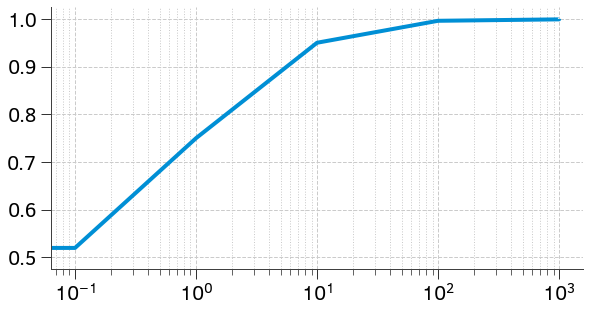

In [543]:
X_i = [0, .1, 1, 1e1, 1e2, 1e3, 1e3]
Y_i = [.5, .52, .75, .95, .996, .999, .99999]
plot(X_i, Y_i, xlog=True)


In [544]:
X = list(range(21))
Y = list(map(lambda x: sigmoid(x), X))
plot(X, Y, ylabel='Sigmoid')

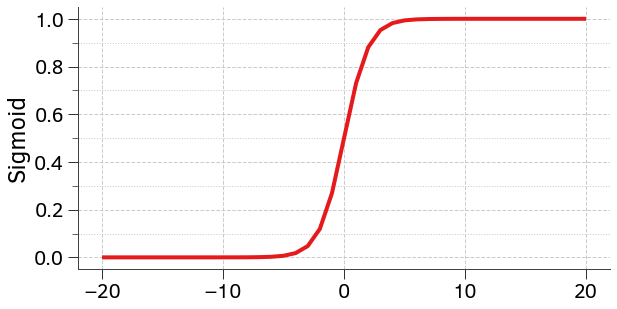

In [536]:
X = list(range(-20, 21))
Y = list(map(lambda x: sigmoid(x), X))
plot(X, Y, ylabel='Sigmoid')

## Normal Distribution

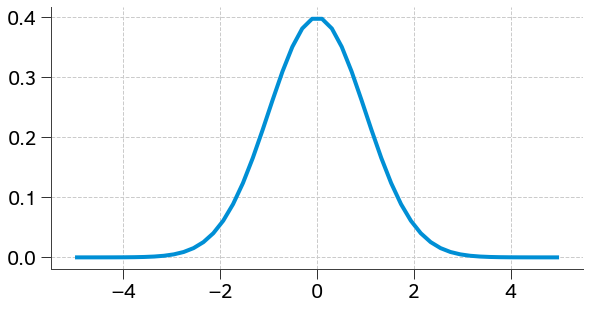

In [545]:
mu = 0
variance = 1
sigma = np.sqrt(variance)

X = np.linspace(-5, 5)
Y = stats.norm.pdf(X, mu, sigma)

plot(X, Y)

## Exponential Distribution

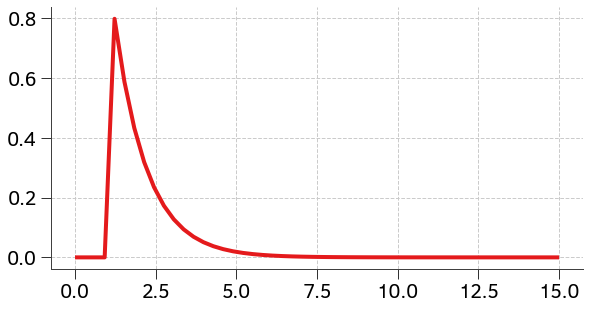

In [364]:
mu = 1
std = 1
X = np.linspace(0, 15)
Y = stats.expon.pdf(X, loc=mu, scale=std)
plot(X, Y)

In [356]:
stats.expon.rvs(loc=0, scale=10, size=5)

array([17.73183974,  3.99334524, 11.69086089,  2.81195063, 16.6216102 ])

In [354]:
np.random.exponential(10, size=5)

array([ 4.7574168 , 15.8308346 ,  2.79642823,  1.471934  ,  4.80454953])

In [225]:
mu = 10
lambda_ = 1
scale = 1/lambda_
stats.expon.rvs(scale=10, size=10000).mean()

10.028865317545112

## Gamma Distribution

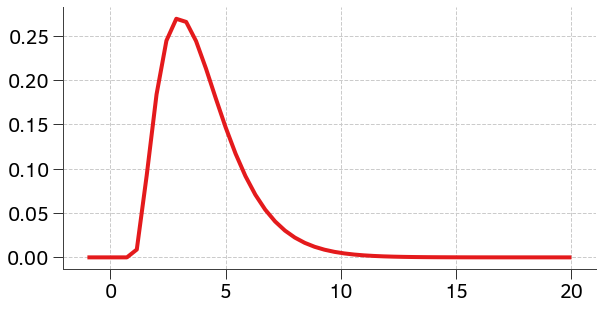

In [148]:
n = 3
lambda_ = 1
scale = 1/lambda_

X = np.linspace(-1, 20)
Y = stats.gamma.pdf(X, n, lambda_)

plot(X, Y)

## Beta Distribution

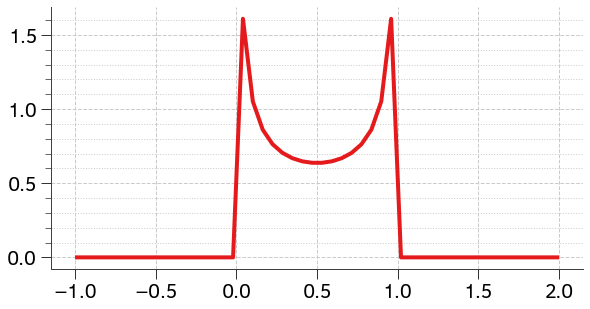

In [538]:
n = .5
lambda_ = .5

X = np.linspace(-1, 2)
Y = stats.beta.pdf(X, n, lambda_)

plot(X, Y)

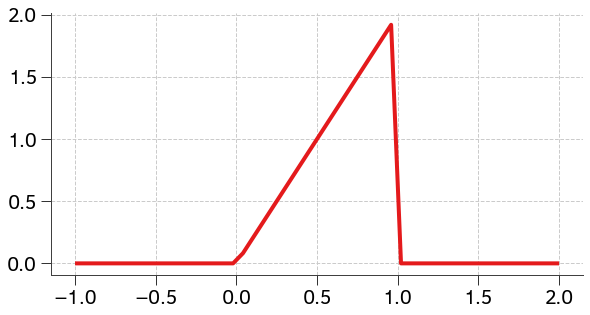

In [171]:
n = 2
lambda_ = 1

X = np.linspace(-1, 2)
Y = stats.beta.pdf(X, n, lambda_)

plot(X, Y)

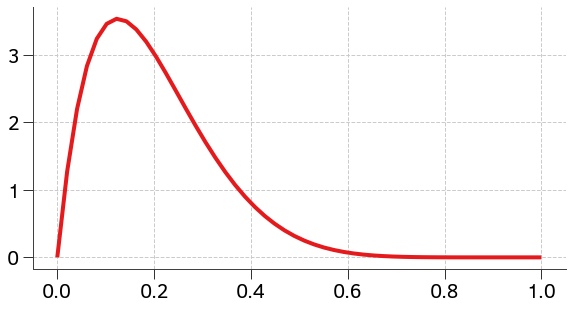

In [172]:
n = 2
lambda_ = 8

X = np.linspace(0, 1)
Y = stats.beta.pdf(X, n, lambda_)

plot(X, Y)

In [384]:
n = 5
lambda_ = 5

X = np.linspace(0, 1)
Y = stats.beta.pdf(X, n, lambda_)

plot(X, Y)

## Logistic Distribution

In [386]:
mu = 0
scale = 1

X = np.linspace(-10, 10)
Y = stats.logistic.pdf(X, loc=mu, scale=scale)

plot(X, Y)

## Pareto Distribution

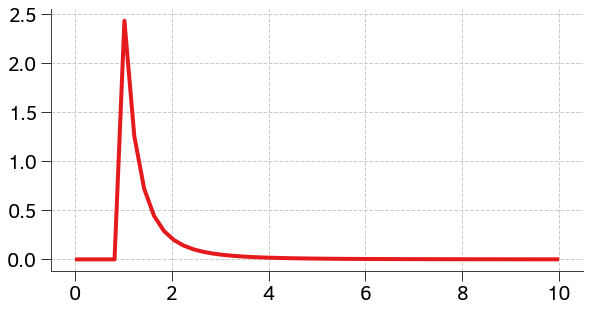

In [395]:
b = 2.62

X = np.linspace(0, 10)
Y = stats.pareto.pdf(X, b=b)

plot(X, Y)

## Power Law Distribution

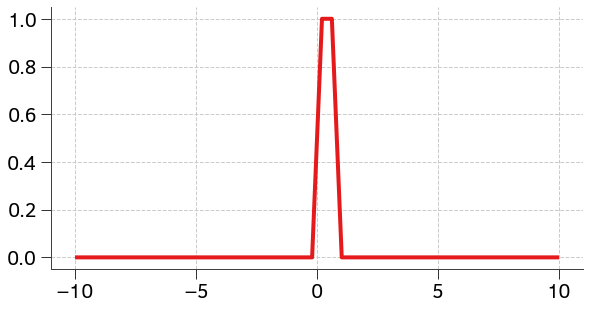

In [415]:
a = 1
mu = 0
scale = 1

X = np.linspace(-10, 10)
Y = stats.powerlaw.pdf(X, loc=mu, scale=scale, a=a)

plot(X, Y)

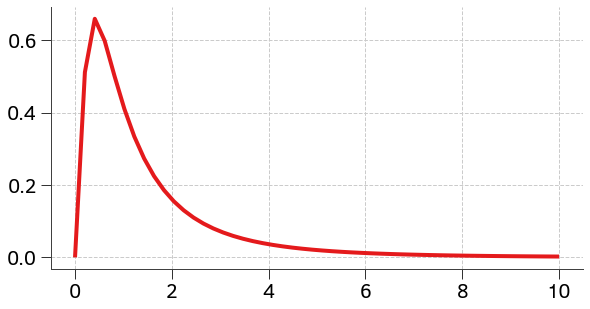

In [427]:
s = 0.954

X = np.linspace(0, 10)
Y = stats.lognorm.pdf(X, s=)

plot(X, Y)

In [547]:
s = 3

X = X_i
Y = stats.lognorm.cdf(X, s=s, scale=.09)

print('X:', X)
print('Y log norm:', Y.round(3))
print('Y_i:', Y_i)

ax = plot(X, Y, xlog=False, label='log-norm', color='red')


X_i = [0, .1, 1, 1e1, 1e2, 1e3, 1e3]
Y_i = [.5, .52, .75, .95, .996, .999, .99999]
plot(X_i, Y_i, xlog=False, ax=ax, label='simulation')

X: [0, 0.1, 1, 10.0, 100.0, 1000.0, 1000.0]
Y log norm: [0.    0.514 0.789 0.942 0.99  0.999 0.999]
Y_i: [0.5, 0.52, 0.75, 0.95, 0.996, 0.999, 0.99999]


X: [0, 0.1, 1, 10.0, 100.0, 1000.0, 1000.0]
Y log norm: [0.    0.514 0.789 0.942 0.99  0.999 0.999]
Y_i: [0.5, 0.52, 0.75, 0.95, 0.996, 0.999, 0.99999]


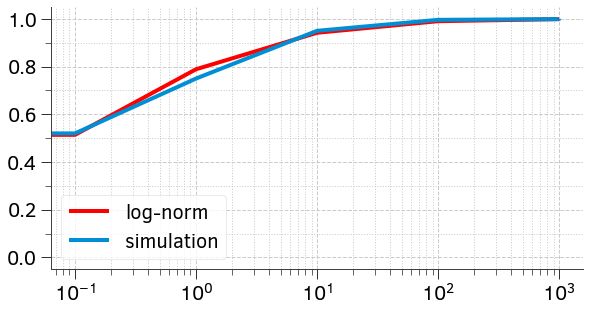

In [550]:
s = 3

X = X_i
Y = stats.lognorm.cdf(X, s=s, scale=.09)

print('X:', X)
print('Y log norm:', Y.round(3))
print('Y_i:', Y_i)

ax = plot(X, Y, xlog=True, label='log-norm', color='red')


X_i = [0, .1, 1, 1e1, 1e2, 1e3, 1e3]
Y_i = [.5, .52, .75, .95, .996, .999, .99999]
plot(X_i, Y_i, xlog=True, ax=ax, label='simulation')

In [506]:
stats.lognorm.cdf(X, s=s, scale=.09)

array([0.        , 0.51400804, 0.78891105, 0.94181302, 0.99029873,
       0.99904936, 0.99904936])

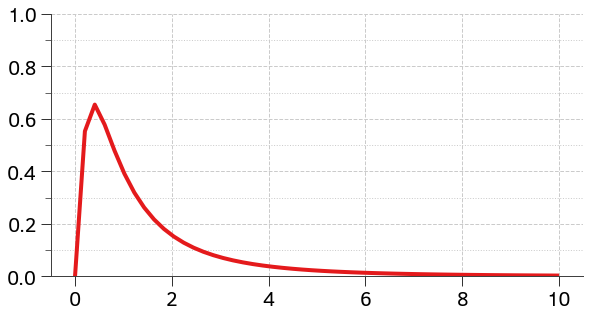

In [525]:
s = 1
scale=1

X = np.linspace(0, 10)
Y = stats.lognorm.pdf(X, s=s, scale=scale)

plot(X, Y)